In [35]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ryanholbrook/ts-course-data")

print("Path to dataset files:", path)

Path to dataset files: /Users/manu13/.cache/kagglehub/datasets/ryanholbrook/ts-course-data/versions/14


In [33]:
import os

for dirname, _, filenames in os.walk('/kaggle/input/ts-course-data'):
    for f in filenames:
        print(os.path.join(dirname, f))

In [30]:
import pandas as pd
import os

file = os.path.join(path, "book_sales.csv")
df = pd.read_csv(file, index_col='Date', parse_dates=['Date']).drop('Paperback', axis=1) # Dropping paper back column
df

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191
2000-04-06,168
2000-04-07,170
2000-04-08,145
2000-04-09,184


In [31]:
print(df.shape)
print(df.index.min(), "to", df.index.max())  # Check date range


(30, 1)
2000-04-01 00:00:00 to 2000-04-30 00:00:00


In [3]:
# target = weight_1 * feature_1 + weight_2 * feature_2 + bias
# We use the ordinary least squares (OLS) to find the weights (
# regression coefficients). Now, we create a time feature.

import numpy as np

df['Time'] = np.arange(len(df.index))

In [4]:
df.index

DatetimeIndex(['2000-04-01', '2000-04-02', '2000-04-03', '2000-04-04',
               '2000-04-05', '2000-04-06', '2000-04-07', '2000-04-08',
               '2000-04-09', '2000-04-10', '2000-04-11', '2000-04-12',
               '2000-04-13', '2000-04-14', '2000-04-15', '2000-04-16',
               '2000-04-17', '2000-04-18', '2000-04-19', '2000-04-20',
               '2000-04-21', '2000-04-22', '2000-04-23', '2000-04-24',
               '2000-04-25', '2000-04-26', '2000-04-27', '2000-04-28',
               '2000-04-29', '2000-04-30'],
              dtype='datetime64[ns]', name='Date', freq=None)

Text(0.5, 1.0, 'Time Plot of Hardcover Sales')

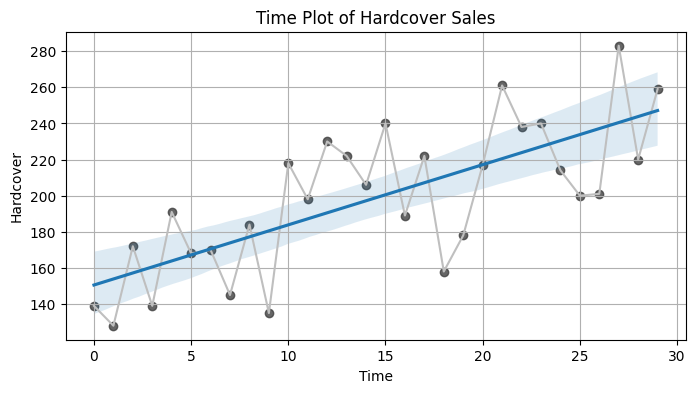

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# target = w * time + b

fig, ax = plt.subplots(figsize=(8,4))
ax.plot('Time', 'Hardcover', data=df, color='0.75')
plt.grid(True)
ax = sns.regplot(x='Time', y='Hardcover', data=df, ci=95, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales')

In [6]:
# Lag features

df["lag_1"] = df["Hardcover"].shift(1)
df

,Hardcover,Time,lag_1
Date,,,
2000-04-01,139,0,NaN
2000-04-02,128,1,139.0
2000-04-03,172,2,128.0
2000-04-04,139,3,172.0
2000-04-05,191,4,139.0
2000-04-06,168,5,191.0
2000-04-07,170,6,168.0
2000-04-08,145,7,170.0
2000-04-09,184,8,145.0


In [7]:
df_l = df.reindex(columns=['Hardcover', 'lag_1']) # Select certain features

df_l

,Hardcover,lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0
2000-04-06,168,191.0
2000-04-07,170,168.0
2000-04-08,145,170.0
2000-04-09,184,145.0


Text(0.5, 1.0, 'Lag Plot of Hardcover Sales')

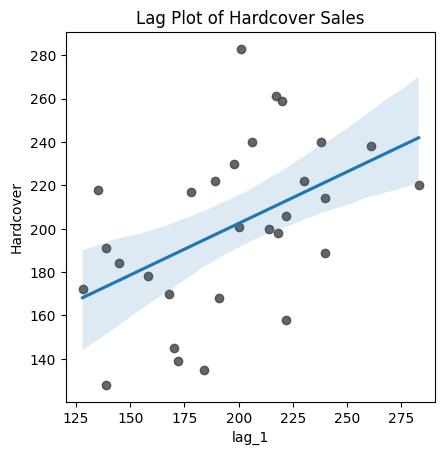

In [8]:
fig, ax = plt.subplots()
ax = sns.regplot(x='lag_1', y='Hardcover', data=df_l, ci=95, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Hardcover Sales')

In [9]:
# More generally, lag features let you model serial dependence. 
# A time series has serial dependence when an observation can be 
# predicted from previous observations. Let's make predictions based on the
# lag and time features.

from sklearn.linear_model import LinearRegression

X = df.loc[:, ['Time']] # Feature 1
y = df.loc[:, 'Hardcover']

model = LinearRegression()
model.fit(X,y)

y_pred = pd.Series(model.predict(X), index=X.index)

Text(0.5, 1.0, 'Time Plot of Tunnel Traffic with Time feature')

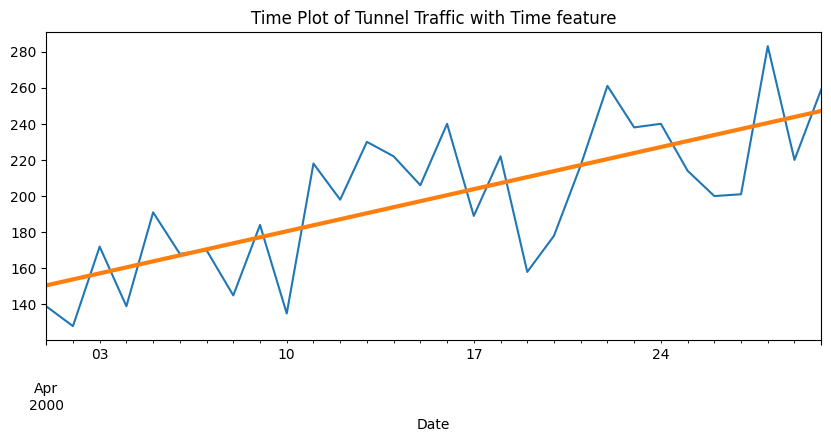

In [10]:
ax = y.plot(figsize=(10,4))
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic with Time feature')

Text(0.5, 1.0, 'Time Plot of Residuals over time')

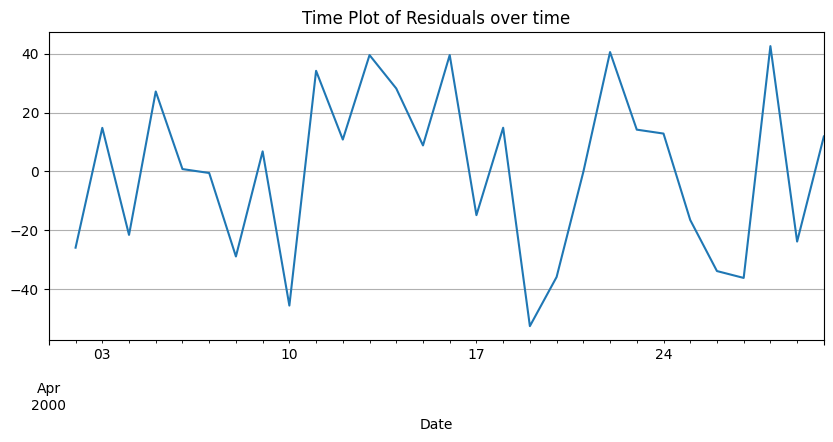

In [ ]:
residuals = y - y_pred
ax = residuals.plot(figsize=(10,4))
plt.grid(True)
ax.set_title('Time Plot of Residuals over time with a time featue')

In [24]:
# Compute the rmse

rmse = np.sqrt(np.mean(residuals**2))
print(f"The RMSE of this prediction is: {rmse}")

The RMSE of this prediction is: 27.566766597703484


In [11]:
X_1 = df.loc[:, ['lag_1']]
X_1.dropna(inplace=True) # Drop missing values (NaN)
y, X_1 = y.align(X_1, join='inner') # Drop corresponding values

model_1 = LinearRegression()
model_1.fit(X_1, y)
y_pred_1 = pd.Series(model_1.predict(X_1), index=X_1.index)

Text(0.5, 1.0, 'Time Plot of Tunnel Traffic with Lags')

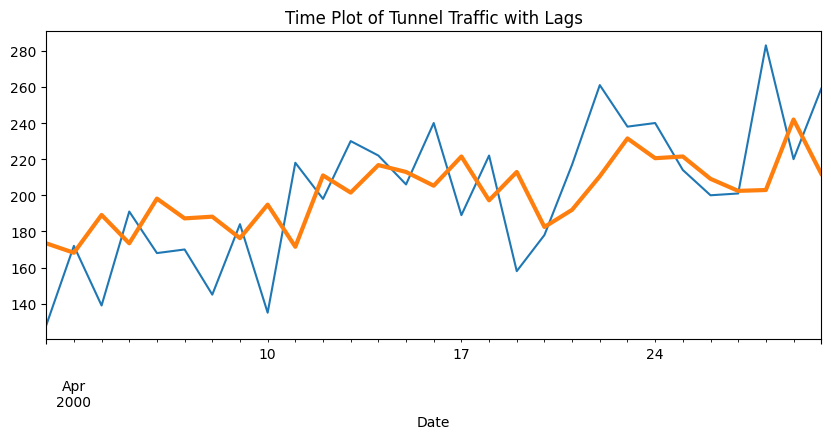

In [12]:
ax_1 = y.plot(figsize=(10,4))
ax_1 = y_pred_1.plot(ax=ax_1, linewidth=3)
ax_1.set_title('Time Plot of Tunnel Traffic with Lags')

Text(0.5, 1.0, 'Time Plot of Residuals over time with lag feature')

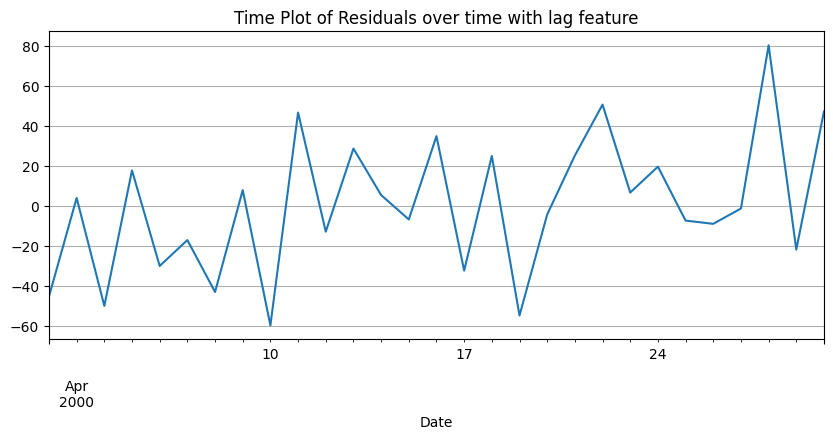

In [21]:
residuals_1 = y - y_pred_1
ax = residuals_1.plot(figsize=(10,4))
plt.grid(True)
ax.set_title('Time Plot of Residuals over time with lag feature')

In [25]:
rmse = np.sqrt(np.mean(residuals_1**2))
print(f"The RMSE of this prediction is: {rmse}")

The RMSE of this prediction is: 34.027186292145174


In [13]:
X_2 = df.loc[:, ['Time', 'lag_1']]
X_2.dropna(inplace=True) # Drop missing values (NaN)
y, X_2 = y.align(X_2, join='inner') # Drop corresponding values

model_2 = LinearRegression()
model_2.fit(X_2, y)
y_pred_2 = pd.Series(model_2.predict(X_2), index=X_2.index)

Text(0.5, 1.0, 'Time Plot of Tunnel Traffic with Lags')

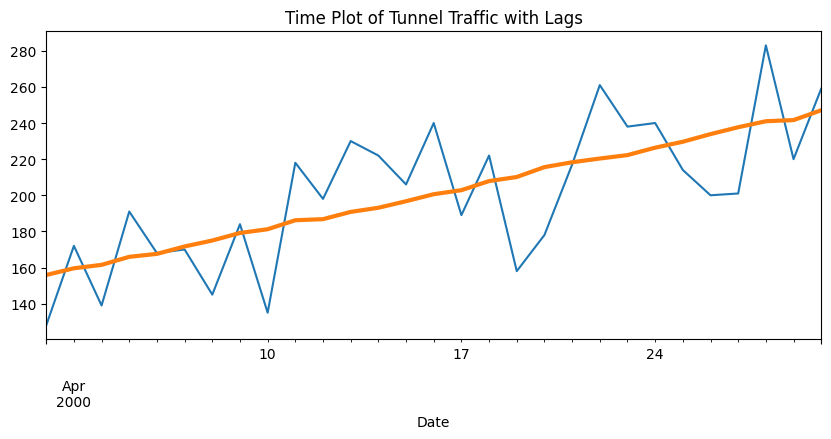

In [14]:
ax_2 = y.plot(figsize=(10,4))
ax_2 = y_pred_2.plot(ax=ax_2, linewidth=3)
ax_2.set_title('Time Plot of Tunnel Traffic with Lags')

Text(0.5, 1.0, 'Time Plot of Residuals over time with both feautes')

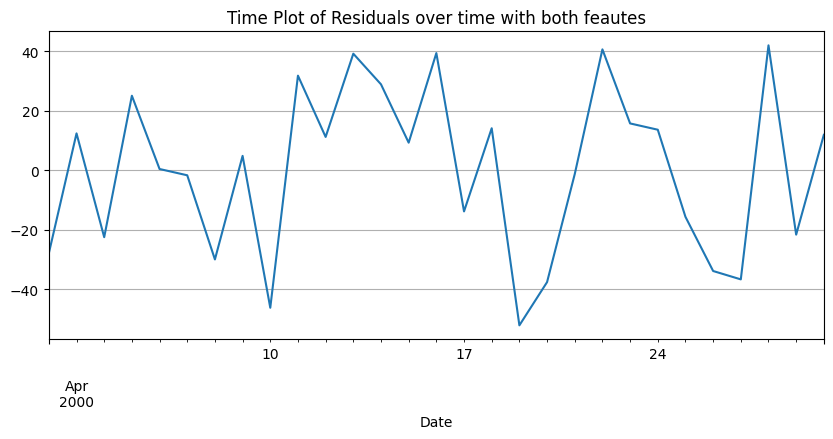

In [22]:
residuals_2 = y - y_pred_2
ax = residuals_2.plot(figsize=(10,4))
plt.grid(True)
ax.set_title('Time Plot of Residuals over time with both feautes')

In [27]:
rmse = np.sqrt(np.mean(residuals_2**2))
print(f"The RMSE of this prediction is: {rmse}")

The RMSE of this prediction is: 27.539561736700815


,Hardcover,Time,lag_1
Date,,,
2000-04-01,139,0,NaN
2000-04-02,128,1,139.0
2000-04-03,172,2,128.0
2000-04-04,139,3,172.0
2000-04-05,191,4,139.0
2000-04-06,168,5,191.0
2000-04-07,170,6,168.0
2000-04-08,145,7,170.0
2000-04-09,184,8,145.0
